# Final Project: Predicting Subscribing Behaviours using Hours Played and Age

## Introduction 

The Pacific Laboratory for Artificial Intelligence(PLAI), led by Frank Wood, is exploring individual behaviour in video games. Their research will enable them to create more sophisticated AI capable of acting in an intricate virtual environment. Particularly, they set up a Minecraft server(PLAICRAFT) to observe player interactions with other players, both voice and behavioural, along with hours spent playing. For players under the age of 13, a parental consent form was filled out.  


PLAI’s board question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?. 

This board question allowed us to formulate our **specific question** that is: Can played hours and Age predict whether the player is subscribing to the game-related newsletter?

We will explore this question using KNN classification. We expect that hours played and Age will very accurately predict(80%+) a user's subscribing behaviours. 

### Data Description:

| Variable       | Type        | Description                                                  |
|----------------|------------|--------------------------------------------------------------|
| experience     | categorical | Self-reported gaming experience (Beginner to  Veteran). |
| subscribe      | logical     | Whether the player subscribed to the game newsletter(TRUE or FALSE).       |
| hashedEmail    | character   | Anonymized player identifier (used to join with sessions).  |
| played_hours   | numeric     | Self-reported hours previously spent playing Minecraft.     |
| name           | character   | Player’s name or nickname (identifier, not a predictor).    |
| gender         | categorical | Self-reported gender.                                       |
| Age            | numeric     | Self-reported age in years.                                 |


Figure 1: The 7 variables in `players.csv` are listed with their data type. 

## Methods & Results

### Exploratory Data Analysis and Visualization 

First, we load our packages and `players.csv` dataset. We do this by utilizing GitHub’s file uploads and the readr functino `read_csv` to read the dataset from a remote URL. This keeps our Jupyter notebook running fully remote with no extra file dependencies.

In [3]:
library(tidyverse)
library(tidymodels)
library(repr)
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 6)#formats all scatterplots 


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
players_url <- "https://raw.githubusercontent.com/604Beast/FINAL_Project_GROUP27/refs/heads/main/players.csv"
players <- read_csv(players_url) 

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The above code shows there are 196 observations in the `players.csv`. 

Since our question is using only `subscribe`, `played_hours` and `Age`, we use the `select` function to have only those 3 variables in our new clean data frame. 

To ensure our KNN classification  analysis works, it is necessary to change the `subscribe` variable from `lgl` to `fct`. This is done by using the `mutate` function with `as.factor` as seen below.


In [5]:
players_clean <- players |> 
                select(subscribe,played_hours, Age) |> #Selecting revelant variables
                mutate(subscribe = as.factor(subscribe)) 
head(players_clean)
                

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


Figure 2: The first 6 rows of our `players_clean`. 


From Figure 2 we the data has majority of people are subscribed to the game related newsletter, and data has many young people. 

Now we compute the summary statistics(mean) of the dataset using `group_by` and `summarize` functions along with total number of people per subscribing category and their respective percentages 


In [6]:
num_obs <-nrow(players_clean) #for the percentage calculation 
players_summary <- players_clean|> 
            group_by(subscribe) |>
            summarize(mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2 ), #rounded to 2 decimals
                     mean_Age = round(mean(Age, na.rm = TRUE), 2), #rounded to 2 decimals
                     count = n(),
            percentage = round(n() / num_obs * 100, 2))#rounded to 2 decimals

players_summary 

subscribe,mean_played_hours,mean_Age,count,percentage
<fct>,<dbl>,<dbl>,<int>,<dbl>
FALSE,0.50,23.75,52,26.53
TRUE,7.78,20.18,144,73.47


Figure 3: Summary Statistics of `players_clean`

Here we can see that the mean age seems to remain somewhat consistent, while a higher mean played hours seems to correspond with a **subscription** to the newsletter.

After that, we take a look at the visual relationship between age, hours played, and subscription status(Fig. 4). This is done by using the `ggplot` function, on the scatter plot we have `Age` on the x-axis, `played_hours` on the y-axis, and `subscribe` is colored on the dots. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


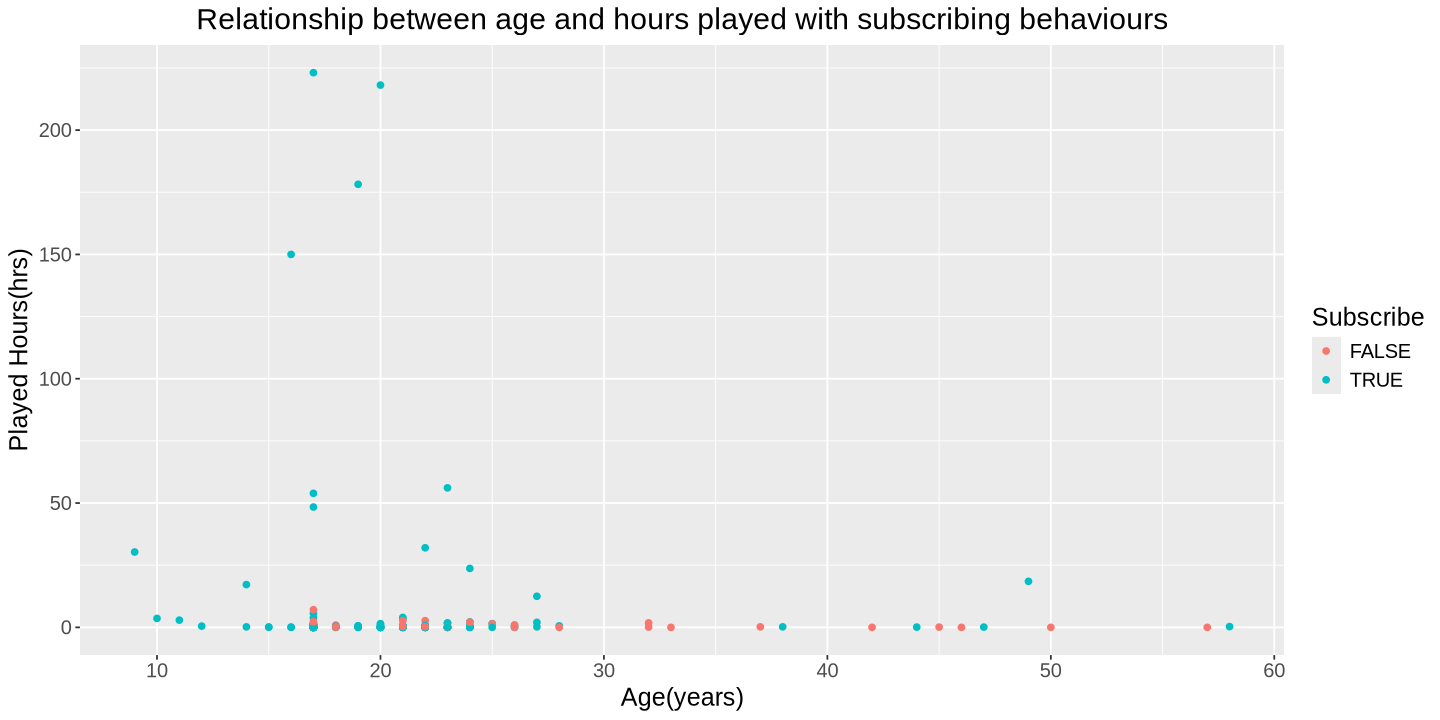

In [7]:

players_plot <- ggplot(players_clean, aes( x = Age, y = played_hours, color = subscribe))+
                    geom_point()+
                    ggtitle("Relationship between age and hours played with subscribing behaviours") + 
                    labs( x = "Age(years)", y = "Played Hours(hrs)", color = "Subscribe")+ 
                    theme(text = element_text(size = 15)) +
                    theme(plot.title = element_text(hjust =0.5))
players_plot

Figure 4: Scatterplott of played hours(hrs) and age(years) with labeled subcribing behaviours. 

Here we can see that the age doesn't seem to correlate with subscription status while hours played definitely does.

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


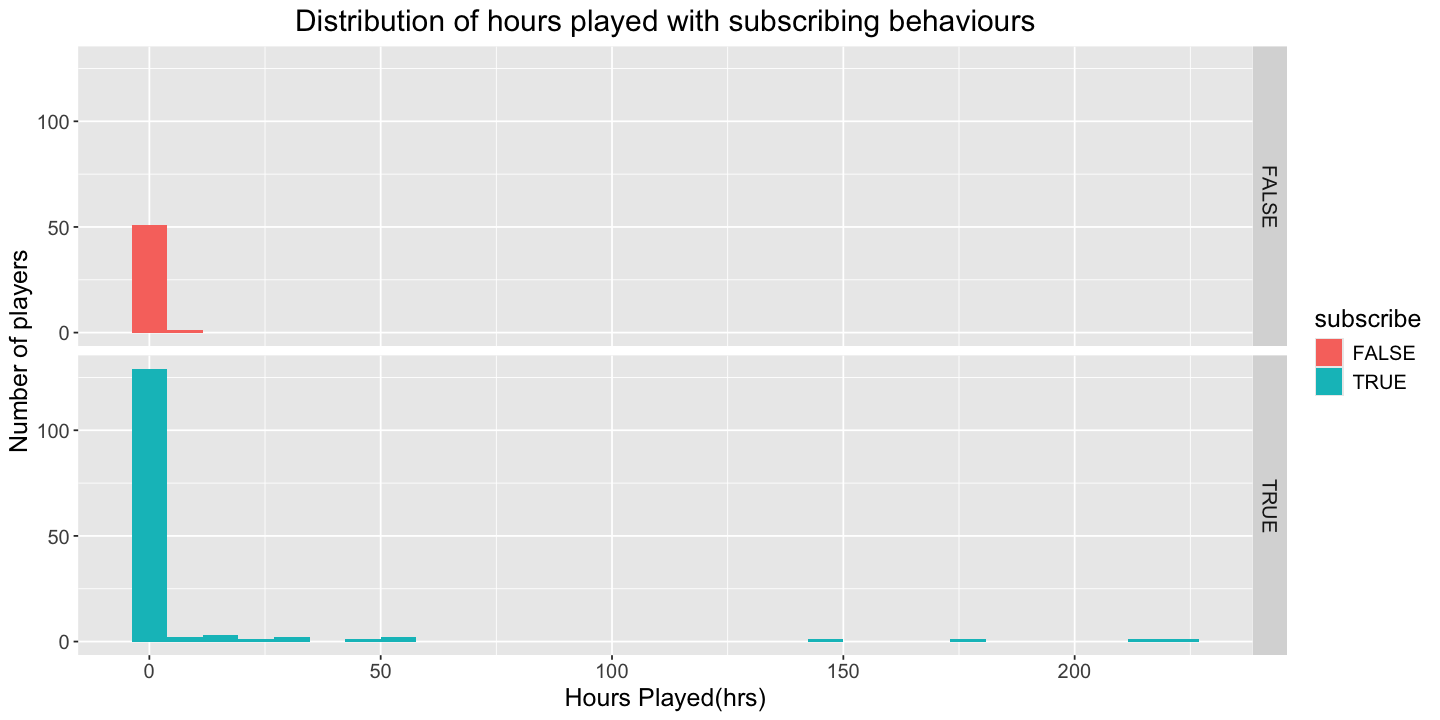

In [6]:
players_histogram_hours <- ggplot(players_clean, aes(x = played_hours, fill = subscribe)) + 
                        geom_histogram()+
                        facet_grid(rows = vars(subscribe))+
                        ggtitle("Distribution of hours played with subscribing behaviours")+
                        labs( x = "Hours Played(hrs)", y = "Number of players")+
                     theme(text = element_text(size = 15)) +
                    theme(plot.title = element_text(hjust =0.5))

players_histogram_hours

Figure 5

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


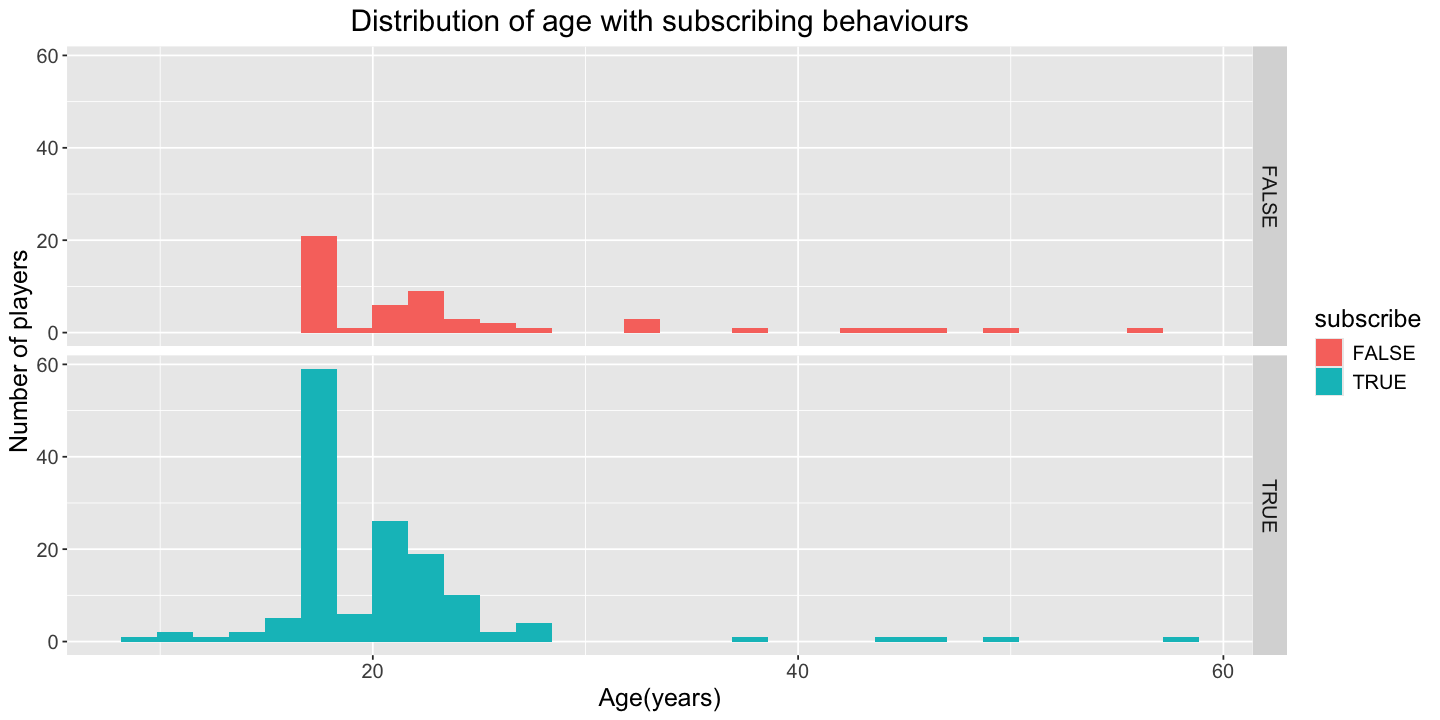

In [7]:
players_histogram_age <- ggplot(players_clean, aes(x = Age, fill = subscribe)) + 
                        geom_histogram()+
                        facet_grid(rows = vars(subscribe))+
                         ggtitle("Distribution of age with subscribing behaviours")+
                    labs( x = "Age(years)", y = "Number of players")+
                     theme(text = element_text(size = 15)) +
                    theme(plot.title = element_text(hjust =0.5))
players_histogram_age


Figure 6

#### Standardized data visualizations

Now we are moving on to creating our prediction model. Before we begin however, it is important to scale and center our predicting variables to ensure that no variable has a greater impact on the outcome than another. After that we visualize our data to confirm that it has been properly standardized.


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


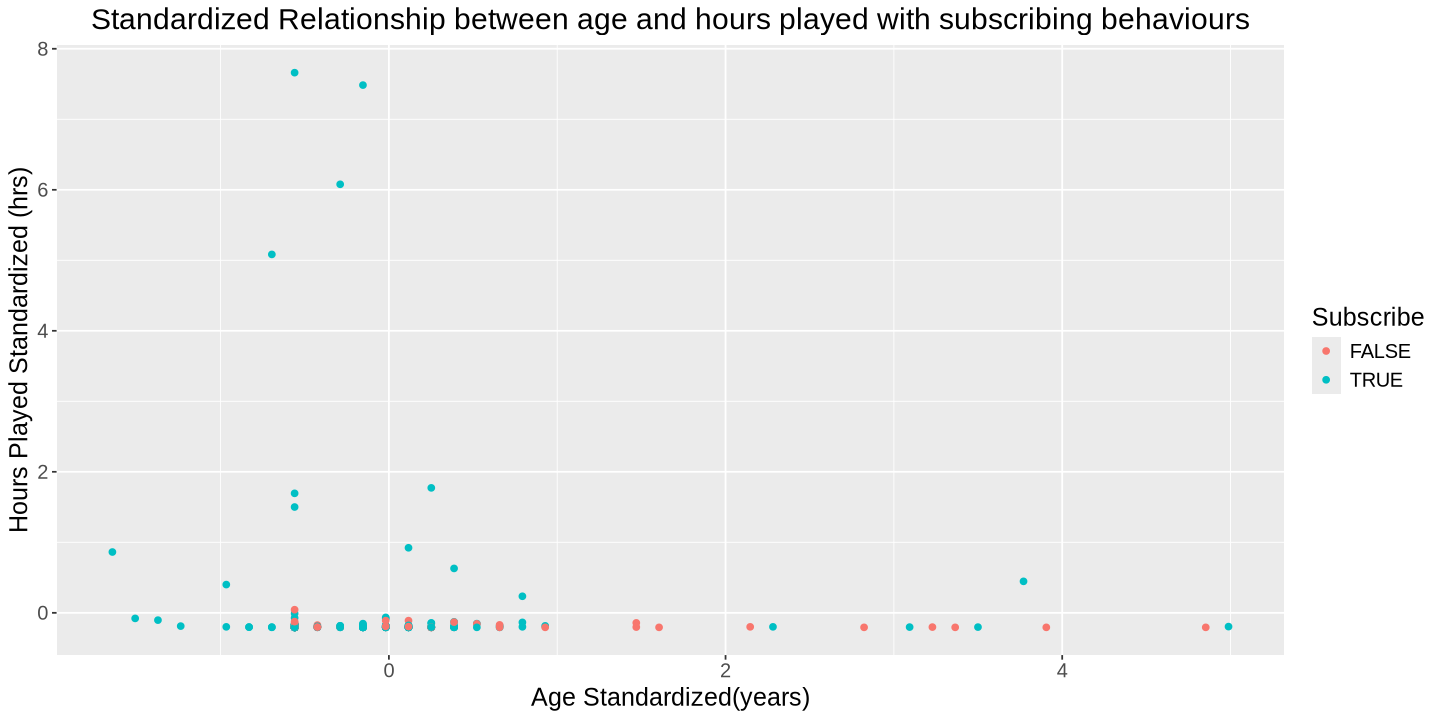

In [9]:
set.seed(9999)
players_standardized <- recipe(subscribe ~ played_hours + Age, data = players_clean) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors()) |>
                    prep() |>
                    bake(players_clean)

players_plot <-ggplot(players_standardized, aes( x = Age, y = played_hours, 
                                            color = subscribe))+
                    geom_point()+
                    ggtitle("Standardized Relationship between age and hours played with subscribing behaviours") + 
                    labs( x = "Age Standardized(years)", y = "Hours Played Standardized (hrs)", color = "Subscribe")+ 
                    theme(text = element_text(size = 15)) +
                    theme(plot.title = element_text(hjust =0.5))
players_plot

Figure 7:

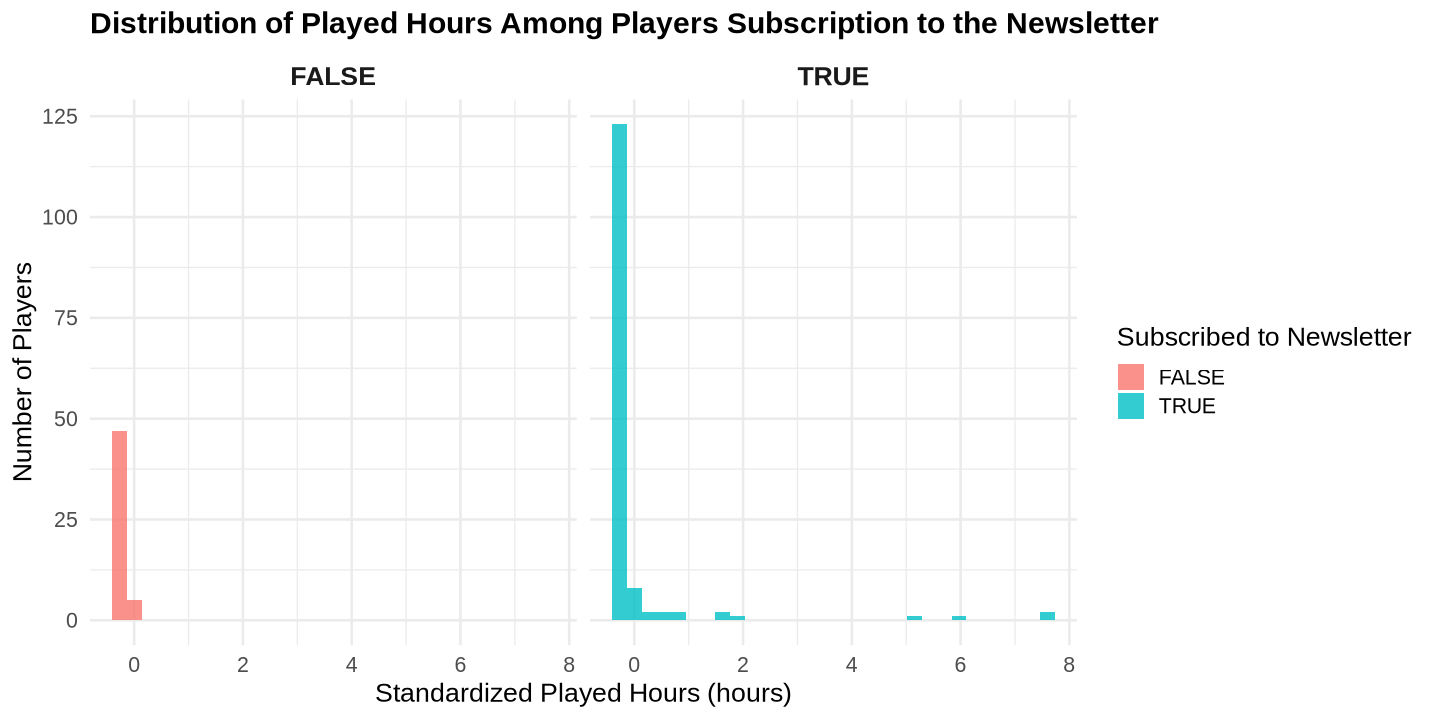

In [13]:
players_histogram_hours <- players_standardized |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
      geom_histogram(bins = 30, alpha = 0.8) +
      facet_grid(. ~ subscribe) +
      labs(
        title = "Distribution of Played Hours Among Players Subscription to the Newsletter",
        x = "Standardized Played Hours (hours)",
        y = "Number of Players",
        fill = "Subscribed to Newsletter"
      ) +
      theme_minimal(base_size = 16) +
      theme(
        plot.title = element_text(size = 18, face = "bold"),
        strip.text = element_text(size = 16, face = "bold")
      )

players_histogram_hours

Figure 8:

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


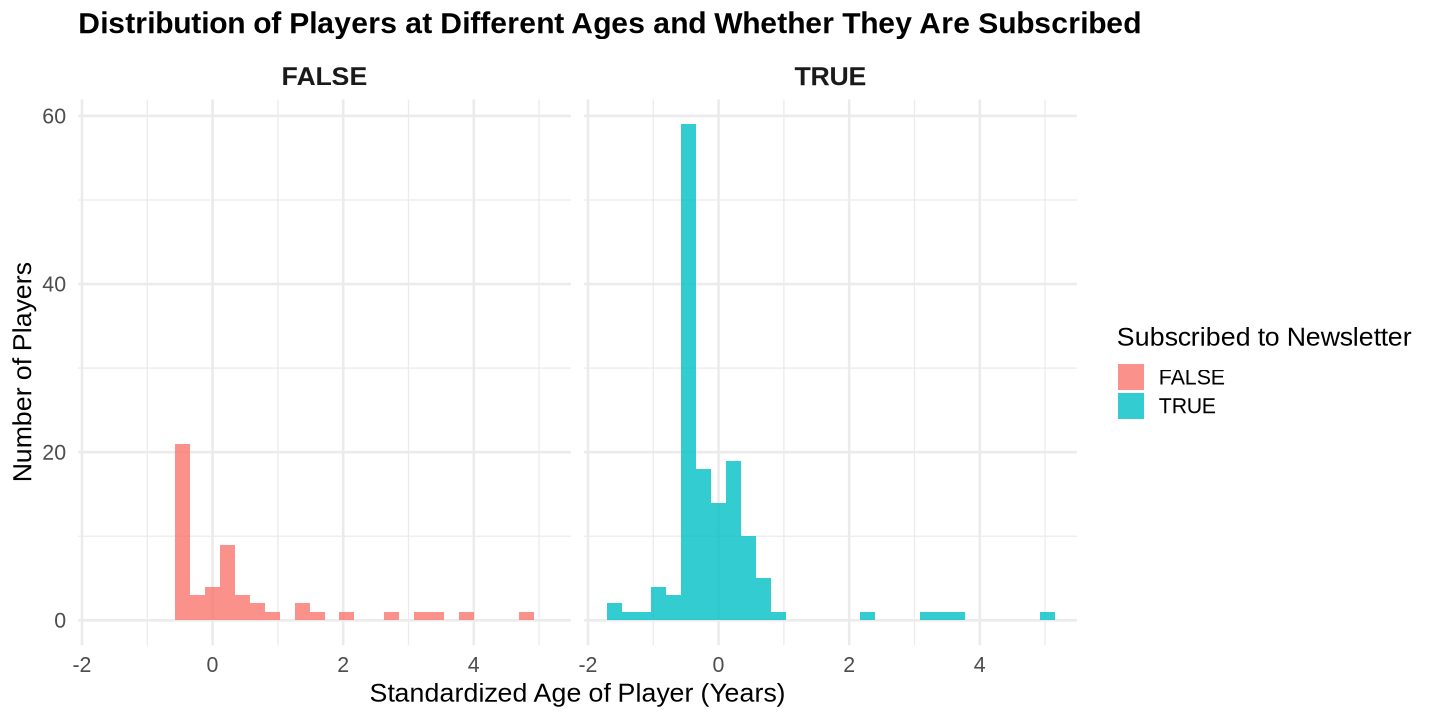

In [14]:
players_histogram_age <- players_standardized |>
    ggplot(aes(x = Age, fill = subscribe)) +
      geom_histogram(bins = 30, alpha = 0.8) +
      facet_grid(. ~ subscribe)+
      labs(
        title = "Distribution of Players at Different Ages and Whether They Are Subscribed",
        x = "Standardized Age of Player (Years)",
        y = "Number of Players",
        fill = "Subscribed to Newsletter"
      ) +
      theme_minimal(base_size = 16) +
      theme(
        plot.title = element_text(size = 18, face = "bold"),
        strip.text = element_text(size = 16, face = "bold")
      )

players_histogram_age

Figure 9

### Classifier preprocessing and finding the best $k$ value

Then we split our data 70/30 into training and testing sets respectively. We do this so that we have both real data to train and test our model on resulting in the most reliable training and evaluation. 

In [9]:
set.seed(9999)
players_split <- initial_split(players_clean, prop = 0.70, strata = subscribe)  
players_training <- training(players_split)
players_testing <-testing(players_split)

head(players_training)
nrow(players_training)  
nrow(players_testing) 

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
FALSE,0.0,17
FALSE,0.0,21
FALSE,0.0,22
FALSE,0.1,17
FALSE,0.0,23
FALSE,0.1,18


[1] 136

[1] 60

Figure 10: The first 6 rows of `players_training`. The total number of rows in `players_training` is 136 whereas in `players_testing` is 60

Before we create our workflow, it is a good idea to validate that our training set remains representative of our original dataset. Here it looks like it is as we see the same pattern following an increase in hours played among those who subscribed.

In [10]:
player_training_summary <- players_training|> 
            group_by(subscribe) |>
            summarize(mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2 ), #rounded to 2 decimals
                     mean_Age = round(mean(Age, na.rm = TRUE), 2), #rounded to 2 decimals
                     count = n(),
            percentage = round(n() / 136 * 100, 2))
player_training_summary

subscribe,mean_played_hours,mean_Age,count,percentage
<fct>,<dbl>,<dbl>,<int>,<dbl>
FALSE,0.54,21.56,36,26.47
TRUE,4.89,20.59,100,73.53


Figure 11

Here we begin on the actual creation of our prediction model with the goal of determining the best K value. We start by defining our recipe as predicting subscribe with played_hours and Age.


In [11]:
set.seed(9999) 
players_recipe <-recipe(subscribe ~ played_hours +Age, data = players_training)|> 
                step_scale(all_predictors()) |>
                step_center(all_predictors())

Next, we define our knn model with nearest_neighbour. We set our weight_func to rectangular to ensure that each predictor has an even weight in our prediction. Our neighbours is set to tune() as we are using this model to find the best K value. 

In [12]:
set.seed(9999)
players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
            set_engine("kknn")|>
            set_mode("classification") 

Then we define our vfolds. We use five folds of the players_training data with subscribe as our strata. This splits our data into five sections using four as training, and one as testing data. Our model will go through this process five times in order to ensure that every fold is used as both training and testing. We would like to test K values between one and 50 as defined in our k_vals variable.

In [13]:
set.seed(9999)
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)
k_vals <- tibble(neighbors = c(1:50))

Finally, we combine all of this into a workflow by adding our recipe and model, and defining our tune grid with our vfolds and k_vals. Then we collect our accuracy metric by selecting the mean accuracy value for each neighbour value. Arranging this from highest to lowest accuracy, we can see that 24 is our most accurate K value. This is also visible when we plot the results in a line graph (fig 8). We see that the highest accuracy point is the same as the table: 24.

In [25]:
set.seed(9999)
players_results <-workflow() |>
                add_recipe(players_recipe)|>
                add_model(players_tune) |>
                tune_grid(resamples = players_vfold, grid = k_vals)|>
                collect_metrics()|>
                filter(.metric == "accuracy")|>
                select(neighbors, mean) |>
                arrange(desc(mean))

head(players_results)

→ A | error:   Assigned data `.ind` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 27 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 27 to size 26.

There were issues with some computations   A: x1

There were issues with some computations   A: x1128

There were issues with some computations   A: x1276

There were issues with some computations   A: x1281

There were issues with some computations   A: x2550





neighbors,mean
<int>,<dbl>
24,0.7689594
19,0.7566138
21,0.7566138
25,0.7566138
22,0.7442681
23,0.7442681


Figure 12 :

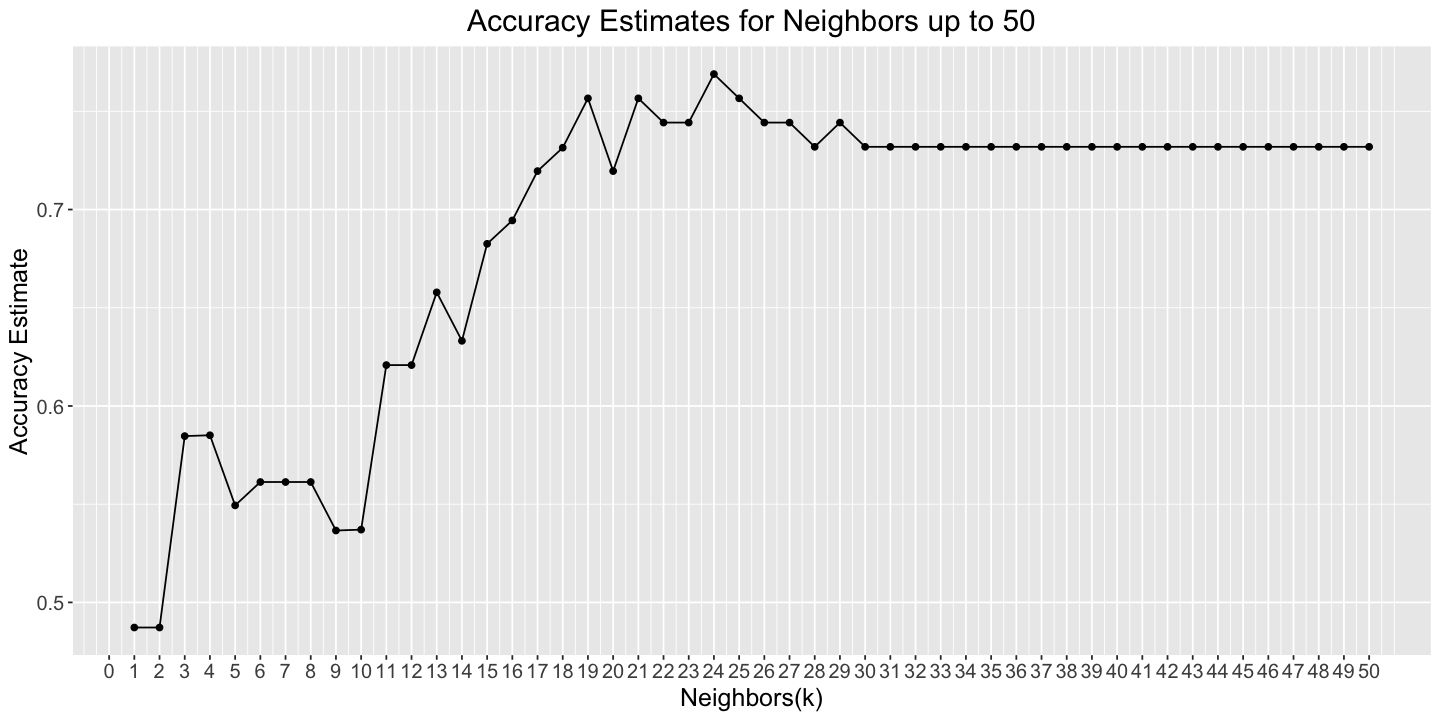

In [15]:
accuracy_vs_k <- ggplot(players_results, aes(x = neighbors, y = mean))+ 
                geom_point()+ 
                geom_line()+ 
                labs( x = "Neighbors(k)", y = "Accuracy Estimate") + 
                scale_x_continuous(breaks = seq(0,50, by = 1)) + 
                ggtitle("Accuracy Estimates for Neighbors up to 50")+
                theme(plot.title = element_text(hjust =0.5))+
                theme(text = element_text(size = 15))

accuracy_vs_k

Figure 13:

Finally, we create a new model spec with our most accurate K as our neighbours' value. In our workflow we can reuse the previous recipe as nothing has changed. We then fit our model to the training dataset to finalize the creation of our model.

In [ ]:
set.seed(9999)
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 24) |>
                set_engine("kknn") |>
                set_mode("classification")

players_fit <- workflow() |>
            add_recipe(players_recipe) |>
            add_model(players_best_spec) |>
            fit(data = players_training)
players_fit
                                       

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(23,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2686567
Best kernel: rectangular
Best k: 23

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


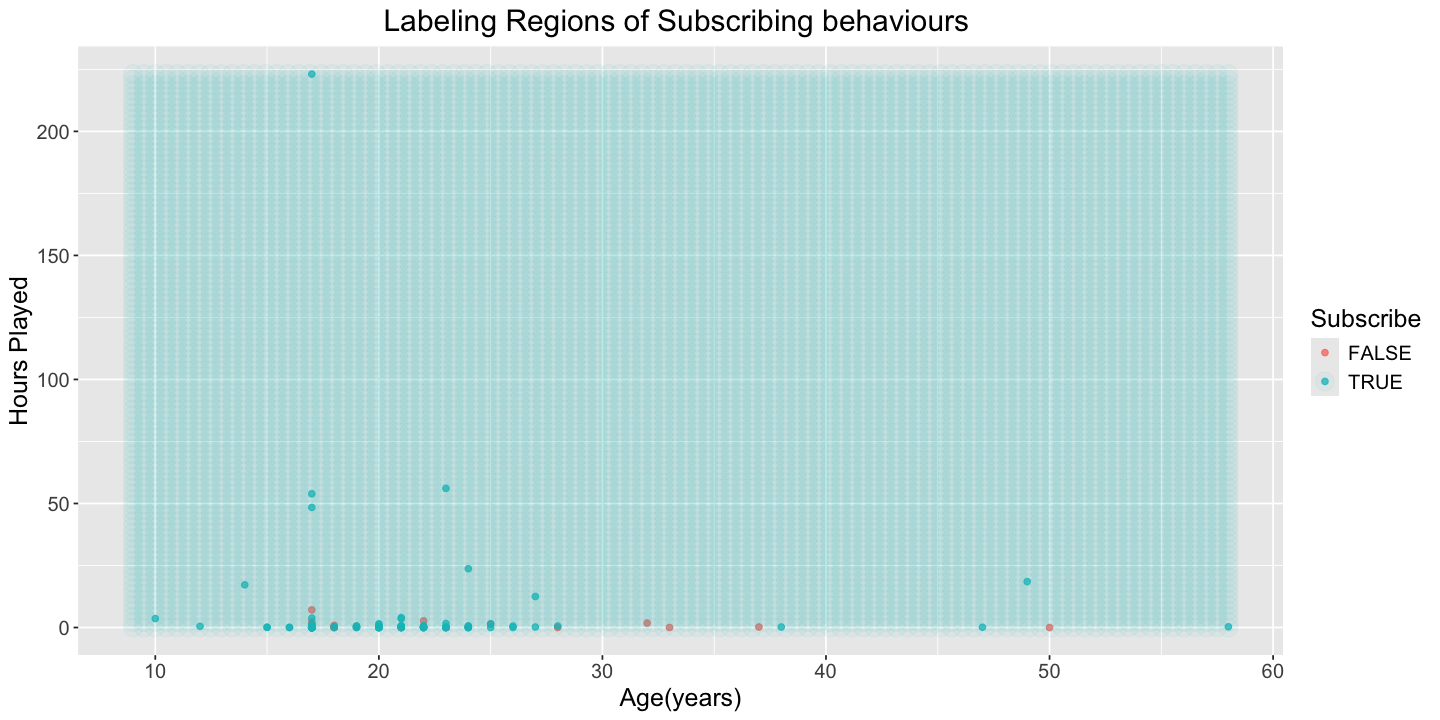

In [26]:
set.seed(9999)
played_hours_grid<- seq(min(players_clean$played_hours), 
                max(players_clean$played_hours ), 
                length.out = 100)

Age_grid <- seq(min(players_clean$Age,na.rm = TRUE), 
                max(players_clean$Age, na.rm= TRUE), 
                length.out = 100)

all_grid <- as_tibble(expand.grid(played_hours =  played_hours_grid, 
                        Age= Age_grid))

predgrid <- predict(players_fit, all_grid)
pred_df <- bind_cols(predgrid,all_grid) 


plot_results <- ggplot(players_training, aes(x = Age, y = played_hours, color = subscribe)) + 
                geom_point(alpha = 0.75) +
                geom_point(data = pred_df, aes(color=.pred_class),
                           alpha = 0.05, 
                           size = 5) +
                labs(x = "Age(years)", y = "Hours Played", 
                     color = "Subscribe", 
                     title = "Labeling Regions of Subscribing behaviours ") +
                theme(plot.title = element_text(hjust =0.5))+
                theme(text = element_text(size = 15))

plot_results

Figure 14

Now we predict our testing dataset with our new best KNN model.

In [18]:
players_predictions <- predict(players_fit, players_testing) |>
                bind_cols(players_testing)


We then collect our accuracy metrics by setting the true value to the subscribe column in the testing dataset, and setting the estimate value to our predicted value. Looking at the metrics, we see that we have an accuracy of 73%.

In [19]:
players_metrics <- players_predictions |>
        metrics(truth = subscribe, estimate = .pred_class)|>
        filter( .metric == "accuracy")

players_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7333333


Figure 15: The accuracy of our classifer's prediction

We use the conf_mat function to compute the confusion matrix in which we can see that it correctly predicted a true subscription status 44 times, and a gave a false true prediction 16 times.

In [20]:
players_conf_mat <- players_predictions |>
                    conf_mat(truth = subscribe, estimate = .pred_class)

players_conf_mat
                

          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     16   44

Figure 16: Confusion matrix

## Discussion